In [1]:
from tensorflow.examples.tutorials.mnist import input_data
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import random as ran
import pandas as pd
from sklearn.model_selection import train_test_split

In [62]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('seaborn')

plt.style.available

['bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 'tableau-colorblind10',
 '_classic_test']

# Load data :

### MNIST

In [2]:
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data\train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


### JAFFE

In [3]:
jaffe_X = pd.read_csv("jaffeX.csv",delimiter=";")
jaffe_y = pd.read_csv("jaffeY.csv",delimiter=";")

In [4]:
jaffe_y = pd.get_dummies(jaffe_y.values.reshape([jaffe_y.shape[1]])).values +0.
jaffe_X = jaffe_X.values/255

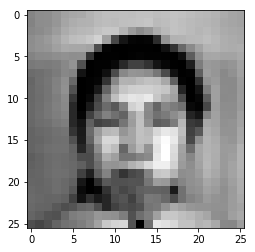

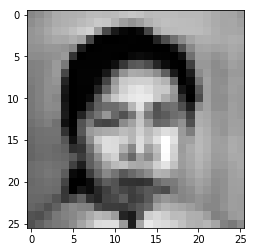

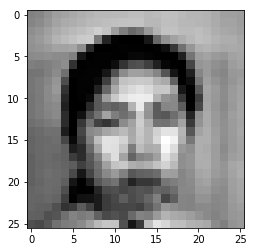

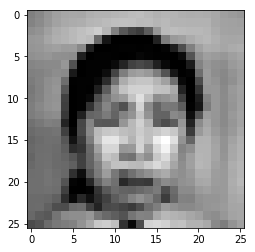

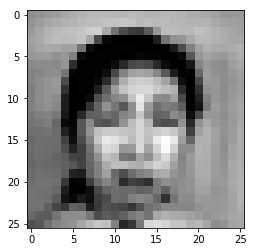

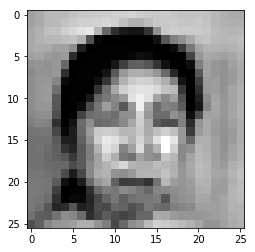

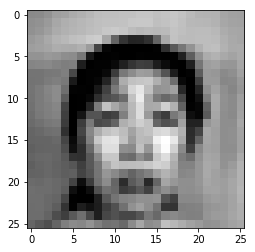

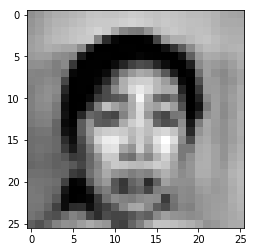

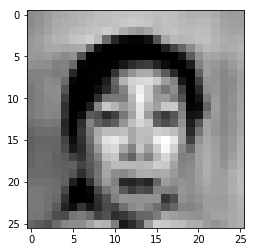

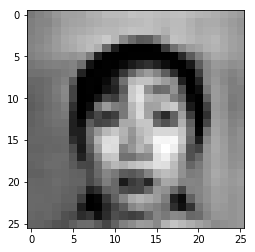

In [5]:
# Affichage d'un exemple d'image

for i in range(10):

    img = jaffe_X[i].reshape([26,26])
    plt.imshow(img.transpose(),cmap="gray")
    plt.show()

In [6]:
# RANDOM SPLIT JAFFE DATASET

X_train, X_test, y_train, y_test = train_test_split( jaffe_X, jaffe_y, test_size=0.25, random_state=42)

print("Number of samples in training set : ",X_train.shape[0])
print("Number of samples in test set : ",X_test.shape[0])

Number of samples in training set :  159
Number of samples in test set :  54


# Neural network with Random initialisation

In [8]:
# CREATION DU RESEAU DE NEURONE

sess.close()
sess = tf.Session()

x = tf.placeholder(tf.float32, shape=[None, 676])

# XAVIER INITIALIZER
initializer =  tf.contrib.layers.xavier_initializer()

# NORMAL DISTRIBUTION
#initializer = tf.random_normal_initializer()

# ZEROS INITIALIZER
#initializer = tf.zeros


W1 = tf.Variable(initializer([676,100]))
b1 = tf.Variable(initializer([100]))

y1 = tf.nn.sigmoid(tf.add(tf.matmul(x,W1),b1))

W2 = tf.Variable(initializer([100,50]))
b2 = tf.Variable(initializer([50]))

y2 = tf.nn.sigmoid(tf.add(tf.matmul(y1,W2),b2))

W3 = tf.Variable(initializer([50,10]))
b3 = tf.Variable(initializer([10]))

y = tf.nn.softmax(tf.add(tf.matmul(y2,W3),b3))

y_ = tf.placeholder(tf.float32, shape=[None, 10])

cross_entropy = -tf.reduce_mean(tf.reduce_sum(y_ * tf.log(y) + (1 - y_) * tf.log(1 - y), axis=1))



LEARNING_RATE = 0.1

training = tf.train.GradientDescentOptimizer(LEARNING_RATE).minimize(cross_entropy)

correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

sess.run(tf.global_variables_initializer())

epoch :  0 / 1000
accuracy :  0.11111111
loss :  3.5215638

epoch :  10 / 1000
accuracy :  0.074074075
loss :  3.239568

epoch :  20 / 1000
accuracy :  0.12962963
loss :  3.2213871

epoch :  30 / 1000
accuracy :  0.12962963
loss :  3.2123694

epoch :  40 / 1000
accuracy :  0.14814815
loss :  3.203472

epoch :  50 / 1000
accuracy :  0.14814815
loss :  3.19427

epoch :  60 / 1000
accuracy :  0.14814815
loss :  3.1846547

epoch :  70 / 1000
accuracy :  0.16666667
loss :  3.1745188

epoch :  80 / 1000
accuracy :  0.18518518
loss :  3.1637442

epoch :  90 / 1000
accuracy :  0.2037037
loss :  3.152202

epoch :  100 / 1000
accuracy :  0.22222222
loss :  3.1397471

epoch :  110 / 1000
accuracy :  0.22222222
loss :  3.1262183

epoch :  120 / 1000
accuracy :  0.22222222
loss :  3.1114345

epoch :  130 / 1000
accuracy :  0.24074075
loss :  3.0951898

epoch :  140 / 1000
accuracy :  0.25925925
loss :  3.0772529

epoch :  150 / 1000
accuracy :  0.2777778
loss :  3.0573633

epoch :  160 / 1000
accur

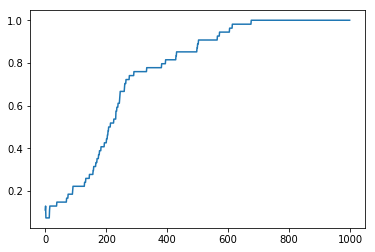

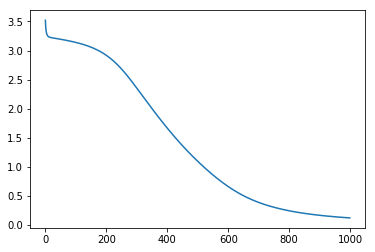

In [9]:
# TRAINING : 

acs = []
ls = []

number_of_epoch = 1000

for i in range(number_of_epoch):
    ac = sess.run(accuracy,feed_dict={x : X_test, y_ : y_test})
    l = sess.run(cross_entropy,feed_dict={x : X_train, y_ : y_train})
    sess.run(training,feed_dict={x : X_train, y_ : y_train})
    acs.append(ac)
    ls.append(l)
    if(i%10 == 0):
        print("epoch : ", i, "/", number_of_epoch)
        print("accuracy : " , ac)
        print("loss : ",l )
        print()
        
plt.plot(acs)
plt.show()

plt.plot(ls)
plt.show()

In [94]:
init1 = tf.contrib.layers.xavier_initializer()
init2 = tf.random_normal_initializer()
init3 = tf.zeros
inits = [init1, init2, init3]

acsList = []
lsList = []

initsS = ["xavier", "distribution normal", "zéro"]

for init, title in zip(inits, initsS):

    print(title)
    # CREATION DU RESEAU DE NEURONE
    sess = tf.Session()

    x = tf.placeholder(tf.float32, shape=[None, 676])

    # XAVIER INITIALIZER
    #initializer =  tf.contrib.layers.xavier_initializer()

    # NORMAL DISTRIBUTION
    #initializer = tf.random_normal_initializer()

    # ZEROS INITIALIZER
    #initializer = tf.zeros

    W1 = tf.Variable(initializer([676,100]))
    b1 = tf.Variable(initializer([100]))

    y1 = tf.nn.sigmoid(tf.add(tf.matmul(x,W1),b1))

    W2 = tf.Variable(initializer([100,50]))
    b2 = tf.Variable(initializer([50]))

    y2 = tf.nn.sigmoid(tf.add(tf.matmul(y1,W2),b2))

    W3 = tf.Variable(initializer([50,10]))
    b3 = tf.Variable(initializer([10]))

    y = tf.nn.softmax(tf.add(tf.matmul(y2,W3),b3))

    y_ = tf.placeholder(tf.float32, shape=[None, 10])

    cross_entropy = -tf.reduce_mean(tf.reduce_sum(y_ * tf.log(y) + (1 - y_) * tf.log(1 - y), axis=1))



    LEARNING_RATE = 0.1

    training = tf.train.GradientDescentOptimizer(LEARNING_RATE).minimize(cross_entropy)

    correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

    sess.run(tf.global_variables_initializer())




    # TRAINING : 

    acs = []
    ls = []

    number_of_epoch = 1000

    for i in range(number_of_epoch):
        ac = sess.run(accuracy,feed_dict={x : X_test, y_ : y_test})
        l = sess.run(cross_entropy,feed_dict={x : X_train, y_ : y_train})
        sess.run(training,feed_dict={x : X_train, y_ : y_train})
        acs.append(ac)
        ls.append(l)
        if(i%10 == 0):
            print("epoch : ", i, "/", number_of_epoch, end=", ")
            print("accuracy : " , ac, end=", ")
            print("loss : ",l )
    acsList.append(acs)
    lsList.append(ls)

xavier
epoch :  0 / 1000, accuracy :  0.074074075, loss :  3.5644608
epoch :  10 / 1000, accuracy :  0.074074075, loss :  3.2510338
epoch :  20 / 1000, accuracy :  0.074074075, loss :  3.2349603
epoch :  30 / 1000, accuracy :  0.074074075, loss :  3.2272937
epoch :  40 / 1000, accuracy :  0.09259259, loss :  3.219801
epoch :  50 / 1000, accuracy :  0.12962963, loss :  3.2121923
epoch :  60 / 1000, accuracy :  0.12962963, loss :  3.2043743
epoch :  70 / 1000, accuracy :  0.12962963, loss :  3.1962578
epoch :  80 / 1000, accuracy :  0.14814815, loss :  3.18775
epoch :  90 / 1000, accuracy :  0.18518518, loss :  3.1787548
epoch :  100 / 1000, accuracy :  0.2037037, loss :  3.1691694
epoch :  110 / 1000, accuracy :  0.22222222, loss :  3.1588821
epoch :  120 / 1000, accuracy :  0.22222222, loss :  3.147771
epoch :  130 / 1000, accuracy :  0.24074075, loss :  3.1356971
epoch :  140 / 1000, accuracy :  0.24074075, loss :  3.1225057
epoch :  150 / 1000, accuracy :  0.24074075, loss :  3.10802

epoch :  350 / 1000, accuracy :  0.7222222, loss :  2.1670103
epoch :  360 / 1000, accuracy :  0.7407407, loss :  2.1066635
epoch :  370 / 1000, accuracy :  0.7592593, loss :  2.0463703
epoch :  380 / 1000, accuracy :  0.7777778, loss :  1.9861596
epoch :  390 / 1000, accuracy :  0.8333333, loss :  1.9260588
epoch :  400 / 1000, accuracy :  0.8333333, loss :  1.8660929
epoch :  410 / 1000, accuracy :  0.8518519, loss :  1.8062832
epoch :  420 / 1000, accuracy :  0.8703704, loss :  1.7466478
epoch :  430 / 1000, accuracy :  0.8703704, loss :  1.6872045
epoch :  440 / 1000, accuracy :  0.8703704, loss :  1.6279734
epoch :  450 / 1000, accuracy :  0.8703704, loss :  1.5689844
epoch :  460 / 1000, accuracy :  0.8703704, loss :  1.5102823
epoch :  470 / 1000, accuracy :  0.8703704, loss :  1.4519336
epoch :  480 / 1000, accuracy :  0.8703704, loss :  1.39403
epoch :  490 / 1000, accuracy :  0.8703704, loss :  1.3366882
epoch :  500 / 1000, accuracy :  0.8888889, loss :  1.2800457
epoch :  5

epoch :  720 / 1000, accuracy :  1.0, loss :  0.42550775
epoch :  730 / 1000, accuracy :  1.0, loss :  0.4045462
epoch :  740 / 1000, accuracy :  1.0, loss :  0.38483873
epoch :  750 / 1000, accuracy :  1.0, loss :  0.36631608
epoch :  760 / 1000, accuracy :  1.0, loss :  0.3489103
epoch :  770 / 1000, accuracy :  1.0, loss :  0.33255506
epoch :  780 / 1000, accuracy :  1.0, loss :  0.31718656
epoch :  790 / 1000, accuracy :  1.0, loss :  0.3027434
epoch :  800 / 1000, accuracy :  1.0, loss :  0.2891672
epoch :  810 / 1000, accuracy :  1.0, loss :  0.2764025
epoch :  820 / 1000, accuracy :  1.0, loss :  0.26439685
epoch :  830 / 1000, accuracy :  1.0, loss :  0.25310075
epoch :  840 / 1000, accuracy :  1.0, loss :  0.24246778
epoch :  850 / 1000, accuracy :  1.0, loss :  0.23245421
epoch :  860 / 1000, accuracy :  1.0, loss :  0.2230192
epoch :  870 / 1000, accuracy :  1.0, loss :  0.21412447
epoch :  880 / 1000, accuracy :  1.0, loss :  0.20573434
epoch :  890 / 1000, accuracy :  1.0,

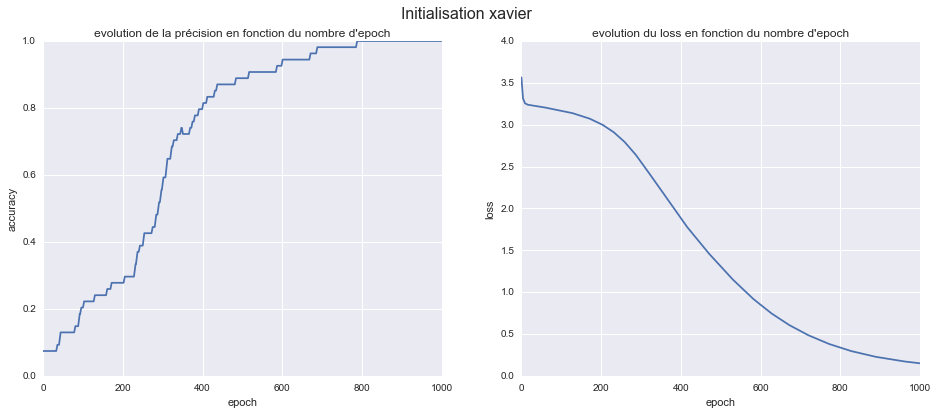

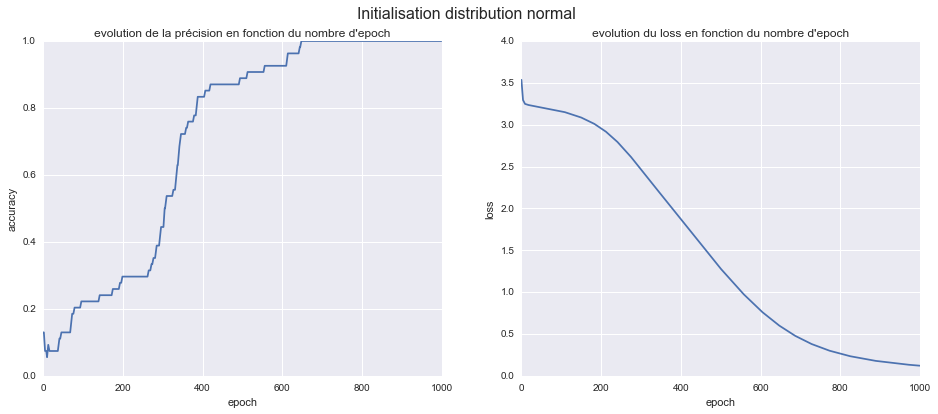

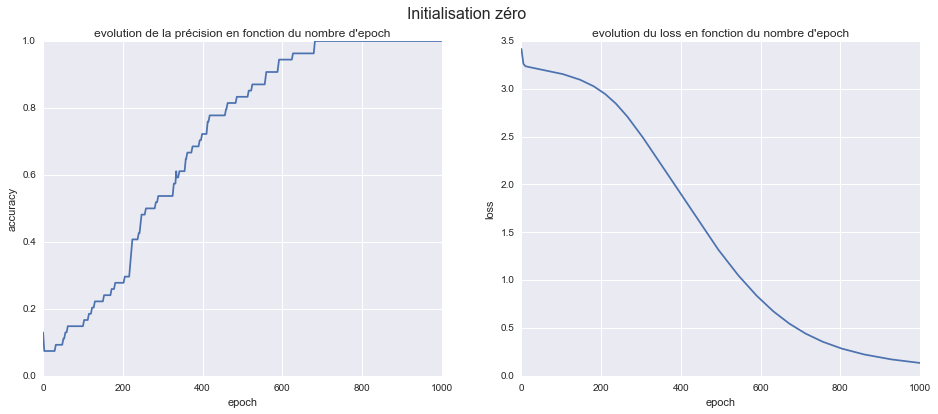

In [95]:
for acs, ls, title in zip(acsList, lsList, initsS):
    plt.figure(figsize=(14, 6))

    ax = plt.subplot(121)    
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)    
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False) 

    ax.get_xaxis().tick_bottom()    
    ax.get_yaxis().tick_left()

    plt.plot(acs)

    plt.xlabel("epoch")
    plt.ylabel("accuracy")
    plt.title("evolution de la précision en fonction du nombre d'epoch")

    ax = plt.subplot(122)    
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)    
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False) 

    ax.get_xaxis().tick_bottom()    
    ax.get_yaxis().tick_left()

    plt.plot(ls)

    plt.xlabel("epoch")
    plt.ylabel("loss")
    plt.title("evolution du loss en fonction du nombre d'epoch")

    plt.suptitle("Initialisation {}".format(title), size=16)

    #plt.tight_layout()
    plt.show()

In [10]:
sess.close()

# AUTO ENCODER

In [98]:
sess = tf.Session()

learning_rate = 0.01

initializer = tf.contrib.layers.xavier_initializer()


X = tf.placeholder(tf.float32, shape=[None, 676])

# encoder layers : 

w1 = tf.Variable(initializer([676, 100]))
b1 = tf.Variable(initializer([100]))

layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(X, w1),b1))

w2 = tf.Variable(initializer([100, 50]))
b2 = tf.Variable(initializer([50]))

layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, w2),b2))

# decoder layers : 

w3 = tf.Variable(initializer([50, 100]))
b3 = tf.Variable(initializer([100]))

layer_3 = tf.nn.sigmoid(tf.add(tf.matmul(layer_2, w3),b3))

w4 = tf.Variable(initializer([100, 676]))
b4 = tf.Variable(initializer([676]))

y_pred = tf.nn.sigmoid(tf.add(tf.matmul(layer_3, w4),b4))

y_true = X

loss = tf.reduce_mean(tf.pow(y_true - y_pred, 2))
optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(loss)

init = tf.global_variables_initializer()
sess.run(init)

loss :  0.060619652
loss :  0.06056461
loss :  0.06047157
loss :  0.060314473
loss :  0.06004978
loss :  0.059605364
loss :  0.058863647
loss :  0.05763813
loss :  0.055647418
loss :  0.05250499
loss :  0.04777786
loss :  0.041222442
loss :  0.033316825
loss :  0.02585839
loss :  0.021228964
loss :  0.01962622
loss :  0.01924536
loss :  0.019136196
loss :  0.019098
loss :  0.019081088
loss :  0.019068494
loss :  0.019049777
loss :  0.019527366
loss :  0.019677974
loss :  0.020064441
loss :  0.019706802
loss :  0.019517204
loss :  0.01847694
loss :  0.016050847
loss :  0.016685931
loss :  0.015606453
loss :  0.013979054
loss :  0.013527095
loss :  0.014739753
loss :  0.013321622
loss :  0.013081552
loss :  0.011213532
loss :  0.012139563
loss :  0.013184986
loss :  0.01327906
loss :  0.010767743
loss :  0.010559373
loss :  0.009754581
loss :  0.009522995
loss :  0.008924289
loss :  0.008725871
loss :  0.008277976
loss :  0.008441923
loss :  0.0074804365
loss :  0.0071822316
loss :  0.01

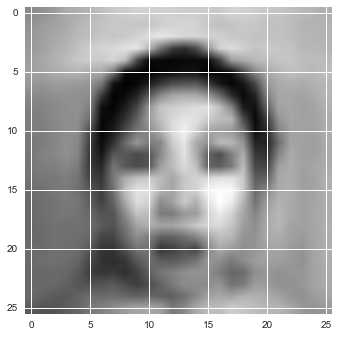

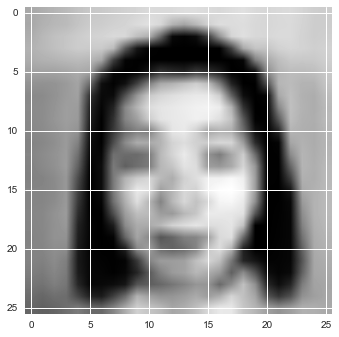

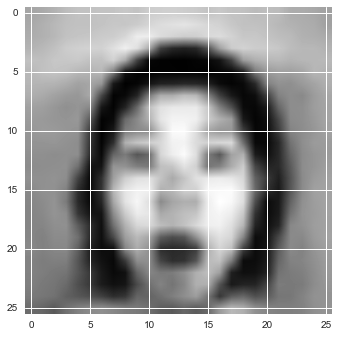

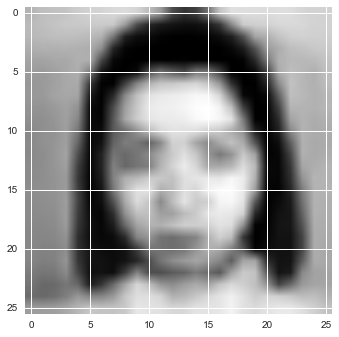

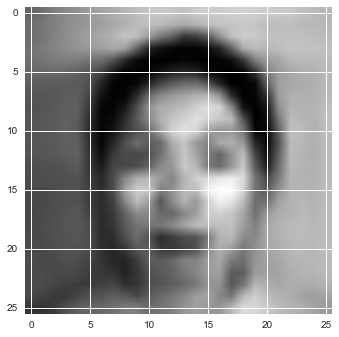

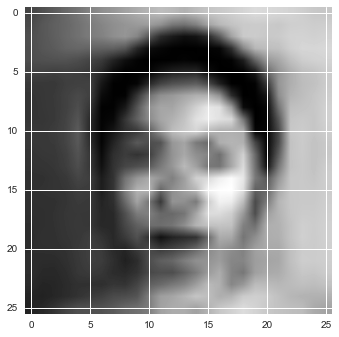

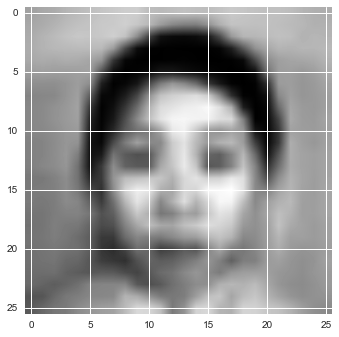

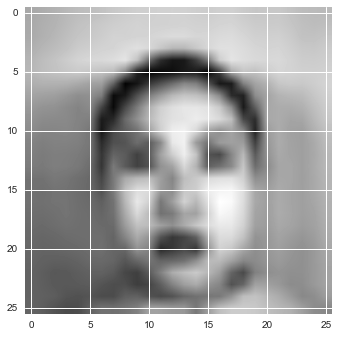

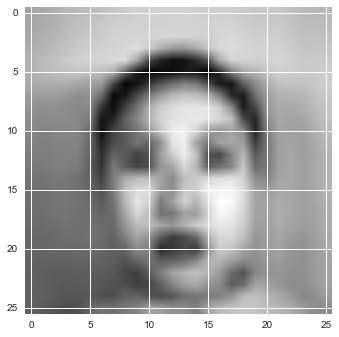

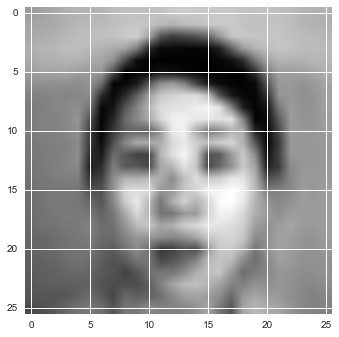

In [99]:
for i in range(1000):

    sess.run(optimizer,feed_dict={X : X_train})
    l = sess.run(loss,feed_dict={X : X_train} )
    if i % 10 == 0 : 
        print("loss : ", l)

img_reconstructed = sess.run(y_pred, feed_dict={X : X_test})

# SHOW 10 reconstructed images :

for i in range(10):
    image = img_reconstructed[i].reshape([26,26])
    plt.imshow(image.transpose(),cmap = "gray")
    plt.show()

## Training with autoencoder initialisation

In [100]:
# CREATION DU RESEAU DE NEURONE
sess.close()
sess = tf.Session()

x = tf.placeholder(tf.float32, shape=[None, 676])

# XAVIER INITIALIZER
initializer =  tf.contrib.layers.xavier_initializer()

W1 = w1
B1 = b1

y1 = tf.nn.sigmoid(tf.add(tf.matmul(x,W1),B1))

W2 = w2
B2 = b2

y2 = tf.nn.sigmoid(tf.add(tf.matmul(y1,W2),B2))

W3 = tf.Variable(initializer([50,10]))
B3 = tf.Variable(initializer([10]))

y = tf.nn.softmax(tf.add(tf.matmul(y2,W3),B3))

y_ = tf.placeholder(tf.float32, shape=[None, 10])

cross_entropy = -tf.reduce_mean(tf.reduce_sum(y_ * tf.log(y) + (1 - y_) * tf.log(1 - y), axis=1))


LEARNING_RATE = 0.1

training = tf.train.GradientDescentOptimizer(LEARNING_RATE).minimize(cross_entropy)

correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

sess.run(tf.global_variables_initializer())

epoch :  0 / 1000
accuracy :  0.11111111
loss :  3.4062524

epoch :  10 / 1000
accuracy :  0.074074075
loss :  3.2340775

epoch :  20 / 1000
accuracy :  0.14814815
loss :  3.2206275

epoch :  30 / 1000
accuracy :  0.14814815
loss :  3.2100992

epoch :  40 / 1000
accuracy :  0.14814815
loss :  3.1992822

epoch :  50 / 1000
accuracy :  0.14814815
loss :  3.1879754

epoch :  60 / 1000
accuracy :  0.14814815
loss :  3.1760373

epoch :  70 / 1000
accuracy :  0.2037037
loss :  3.163311

epoch :  80 / 1000
accuracy :  0.22222222
loss :  3.1496184

epoch :  90 / 1000
accuracy :  0.24074075
loss :  3.1347542

epoch :  100 / 1000
accuracy :  0.2962963
loss :  3.1184835

epoch :  110 / 1000
accuracy :  0.2962963
loss :  3.1005383

epoch :  120 / 1000
accuracy :  0.2962963
loss :  3.0806162

epoch :  130 / 1000
accuracy :  0.2962963
loss :  3.0583816

epoch :  140 / 1000
accuracy :  0.2962963
loss :  3.0334716

epoch :  150 / 1000
accuracy :  0.2962963
loss :  3.0055065

epoch :  160 / 1000
accura

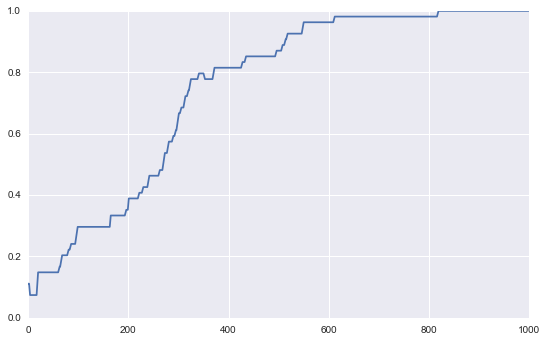

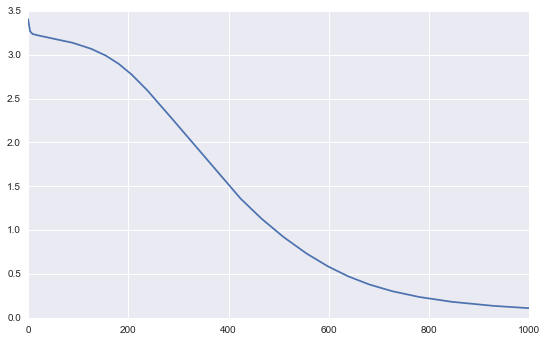

In [101]:
# TRAINING : 

acs = []
ls = []

number_of_epoch = 1000

for i in range(number_of_epoch):
    ac = sess.run(accuracy,feed_dict={x : X_test, y_ : y_test})
    l = sess.run(cross_entropy,feed_dict={x : X_train, y_ : y_train})
    sess.run(training,feed_dict={x : X_train, y_ : y_train})
    acs.append(ac)
    ls.append(l)
    if(i%10 == 0):
        print("epoch : ", i, "/", number_of_epoch)
        print("accuracy : " , ac)
        print("loss : ",l )
        print()
        
plt.plot(acs)
plt.show()

plt.plot(ls)
plt.show()

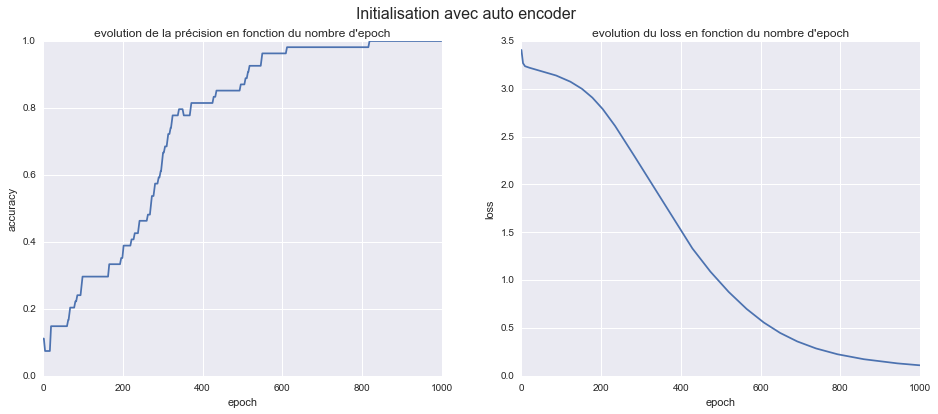

In [102]:
plt.figure(figsize=(14, 6))

ax = plt.subplot(121)    
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False) 

ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()

plt.plot(acs)

plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.title("evolution de la précision en fonction du nombre d'epoch")


ax = plt.subplot(122)    
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False) 

ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()

plt.plot(ls)

plt.xlabel("epoch")
plt.ylabel("loss")
plt.title("evolution du loss en fonction du nombre d'epoch")

plt.suptitle("Initialisation avec auto encoder", size=16)

#plt.tight_layout()
plt.show()


# PCA initialisation : 

In [103]:
# fir

data = X_train.copy()

m = data.mean(axis = 0 )
#data -= data.mean(axis = 0 )
cov = np.cov(data,rowvar=False)
evals , evecs = np.linalg.eigh(cov)

idx = np.argsort(evals)[::-1]
R = evecs[:,idx]
inertia = evals[idx]

Rm =np.dot(m,R)
respca = np.dot(data, R) - Rm

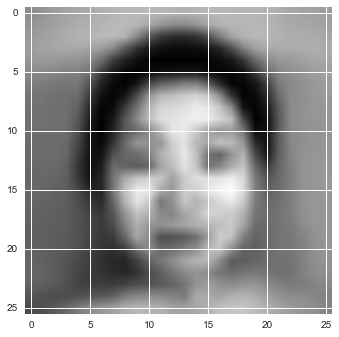

In [104]:
plt.imshow(np.dot(respca,np.linalg.inv(R) + m )[100].reshape([26,26]).T,cmap = "gray")
plt.show()

In [105]:
# Second PCA

data = respca.copy()
m2 = data.mean(axis = 0 )

cov = np.cov(data,rowvar=False)
evals , evecs = np.linalg.eigh(cov)

idx = np.argsort(evals)[::-1]
R2 = evecs[:,idx]
inertia = evals[idx]

Rm2 =np.dot(m,R)
respca = np.dot(data, R) - Rm2

reconstructed = np.linalg.inv(R) + m2

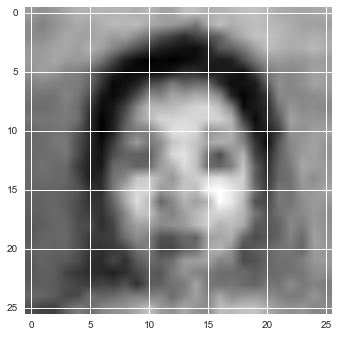

In [106]:
one = (np.dot(np.linalg.inv(R2),reconstructed) + m)[126].reshape([26,26])
plt.imshow(one.T,cmap ="gray")
plt.show()

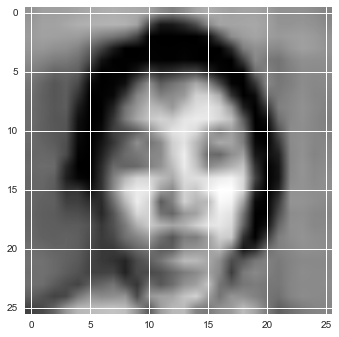

In [107]:
plt.imshow(X_train[25].reshape([26,26]).T,cmap= "gray")
plt.show()

In [108]:
# CONVERT TO FLOAT32

R = np.array(R,dtype="float32")[:,:100]
R2 = np.array(R2,dtype="float32")[:100,:50]
Rm = np.array(Rm,dtype="float32")[:100]
Rm2 = np.array(Rm2,dtype="float32")[:50]


In [109]:
R.shape

(676, 100)

## INITIALISATION WITH PCA

In [110]:
# CREATION DU RESEAU DE NEURONE
sess.close()
sess = tf.Session()

x = tf.placeholder(tf.float32, shape=[None, 676])

# XAVIER INITIALIZER
initializer =  tf.contrib.layers.xavier_initializer()

W1 = tf.Variable(R)
B1 = tf.Variable((-Rm))

y1 = tf.nn.sigmoid(tf.add(tf.matmul(x,W1),B1))

W2 = tf.Variable(R2)
B2 = tf.Variable(-Rm2)

y2 = tf.nn.sigmoid(tf.add(tf.matmul(y1,W2),B2))

W3 = tf.Variable(initializer([50,10]))
B3 = tf.Variable(initializer([10]))

y = tf.nn.softmax(tf.add(tf.matmul(y2,W3),B3))

y_ = tf.placeholder(tf.float32, shape=[None, 10])

cross_entropy = -tf.reduce_mean(tf.reduce_sum(y_ * tf.log(y) + (1 - y_) * tf.log(1 - y), axis=1))


LEARNING_RATE = 0.1

training = tf.train.GradientDescentOptimizer(LEARNING_RATE).minimize(cross_entropy)

correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

sess.run(tf.global_variables_initializer())

epoch :  0 / 1000
accuracy :  0.11111111
loss :  3.8075783

epoch :  10 / 1000
accuracy :  0.055555556
loss :  3.2498941

epoch :  20 / 1000
accuracy :  0.074074075
loss :  3.2327366

epoch :  30 / 1000
accuracy :  0.074074075
loss :  3.2246904

epoch :  40 / 1000
accuracy :  0.074074075
loss :  3.216756

epoch :  50 / 1000
accuracy :  0.11111111
loss :  3.2087207

epoch :  60 / 1000
accuracy :  0.14814815
loss :  3.2005038

epoch :  70 / 1000
accuracy :  0.16666667
loss :  3.192025

epoch :  80 / 1000
accuracy :  0.18518518
loss :  3.1832042

epoch :  90 / 1000
accuracy :  0.22222222
loss :  3.1739595

epoch :  100 / 1000
accuracy :  0.2777778
loss :  3.164207

epoch :  110 / 1000
accuracy :  0.2777778
loss :  3.1538594

epoch :  120 / 1000
accuracy :  0.2777778
loss :  3.142822

epoch :  130 / 1000
accuracy :  0.2962963
loss :  3.1309953

epoch :  140 / 1000
accuracy :  0.2962963
loss :  3.1182687

epoch :  150 / 1000
accuracy :  0.2962963
loss :  3.1045206

epoch :  160 / 1000
accur

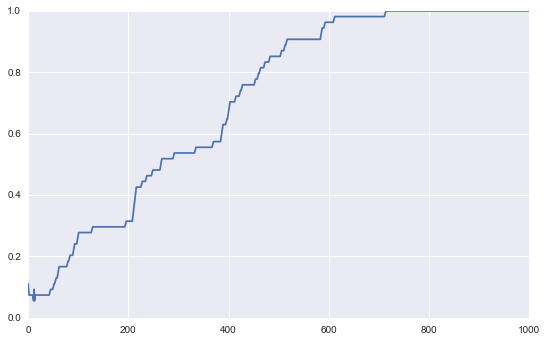

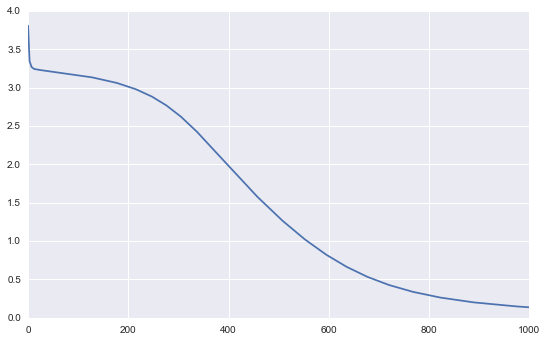

In [111]:
# TRAINING : 

acs = []
ls = []

number_of_epoch = 1000

for i in range(number_of_epoch):
    ac = sess.run(accuracy,feed_dict={x : X_test, y_ : y_test})
    l = sess.run(cross_entropy,feed_dict={x : X_train, y_ : y_train})
    sess.run(training,feed_dict={x : X_train, y_ : y_train})
    acs.append(ac)
    ls.append(l)
    if(i%10 == 0):
        print("epoch : ", i, "/", number_of_epoch)
        print("accuracy : " , ac)
        print("loss : ",l )
        print()
        
plt.plot(acs)
plt.show()

plt.plot(ls)
plt.show()

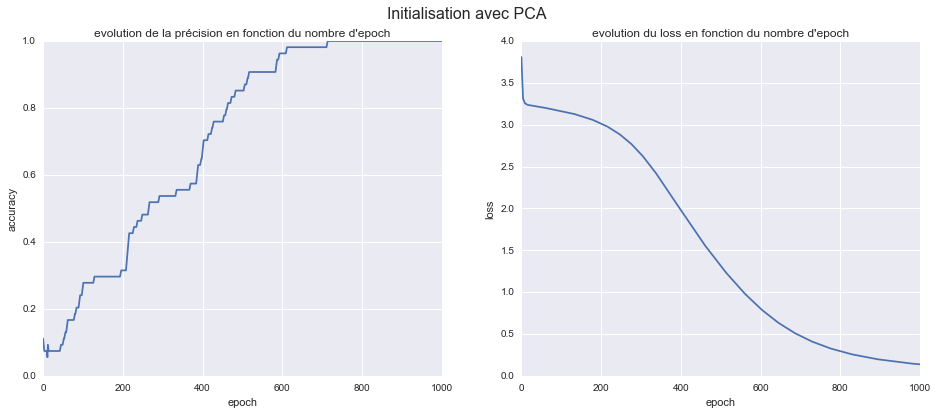

In [112]:
plt.figure(figsize=(14, 6))

ax = plt.subplot(121)    
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False) 

ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()

plt.plot(acs)

plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.title("evolution de la précision en fonction du nombre d'epoch")


ax = plt.subplot(122)    
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False) 

ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()

plt.plot(ls)

plt.xlabel("epoch")
plt.ylabel("loss")
plt.title("evolution du loss en fonction du nombre d'epoch")

plt.suptitle("Initialisation avec PCA", size=16)

#plt.tight_layout()
plt.show()
